# **EDA1**

# 1.	Data Cleaning and Preparation:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats


warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Data

In [74]:
df = pd.read_csv('Cardiotocographic.csv')

In [75]:
df.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


---
## Observations:
- All the features are of the **float** data type
- There are 14  features
- Have **null** values

---

In [77]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

---
## Observations:

- There are null values in various features 
- we need to handle this null values

---

## Extracting the null features

In [78]:
null_features = [feature for  feature in df.columns if df[feature].isnull().sum() >= 1] # features with null values count greater than equal to 1

In [79]:
null_features

['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']

## Calculating the mean median of the null features

In [80]:
for feature in null_features:
    print(f'The mean of the feature {feature} is {round(df[feature].mean(),2)}')
    print(f'The median of the feature {feature} is {round(df[feature].median(),2)}')
    print('-' * 60)

The mean of the feature LB is 133.34
The median of the feature LB is 133.0
------------------------------------------------------------
The mean of the feature AC is 0.0
The median of the feature AC is 0.0
------------------------------------------------------------
The mean of the feature DS is 0.0
The median of the feature DS is 0.0
------------------------------------------------------------
The mean of the feature DP is 0.0
The median of the feature DP is 0.0
------------------------------------------------------------
The mean of the feature MLTV is 8.28
The median of the feature MLTV is 7.4
------------------------------------------------------------
The mean of the feature Width is 70.43
The median of the feature Width is 67.0
------------------------------------------------------------
The mean of the feature Tendency is 0.32
The median of the feature Tendency is 0.0
------------------------------------------------------------
The mean of the feature NSP is 1.3
The median of th

---
## Observations

- **Features** : **AC, DS, DP** have same mean median
- as the mean, median are not varying the feature must not have the outliers.

---

## Ploting the null features to check if outliers are present or not

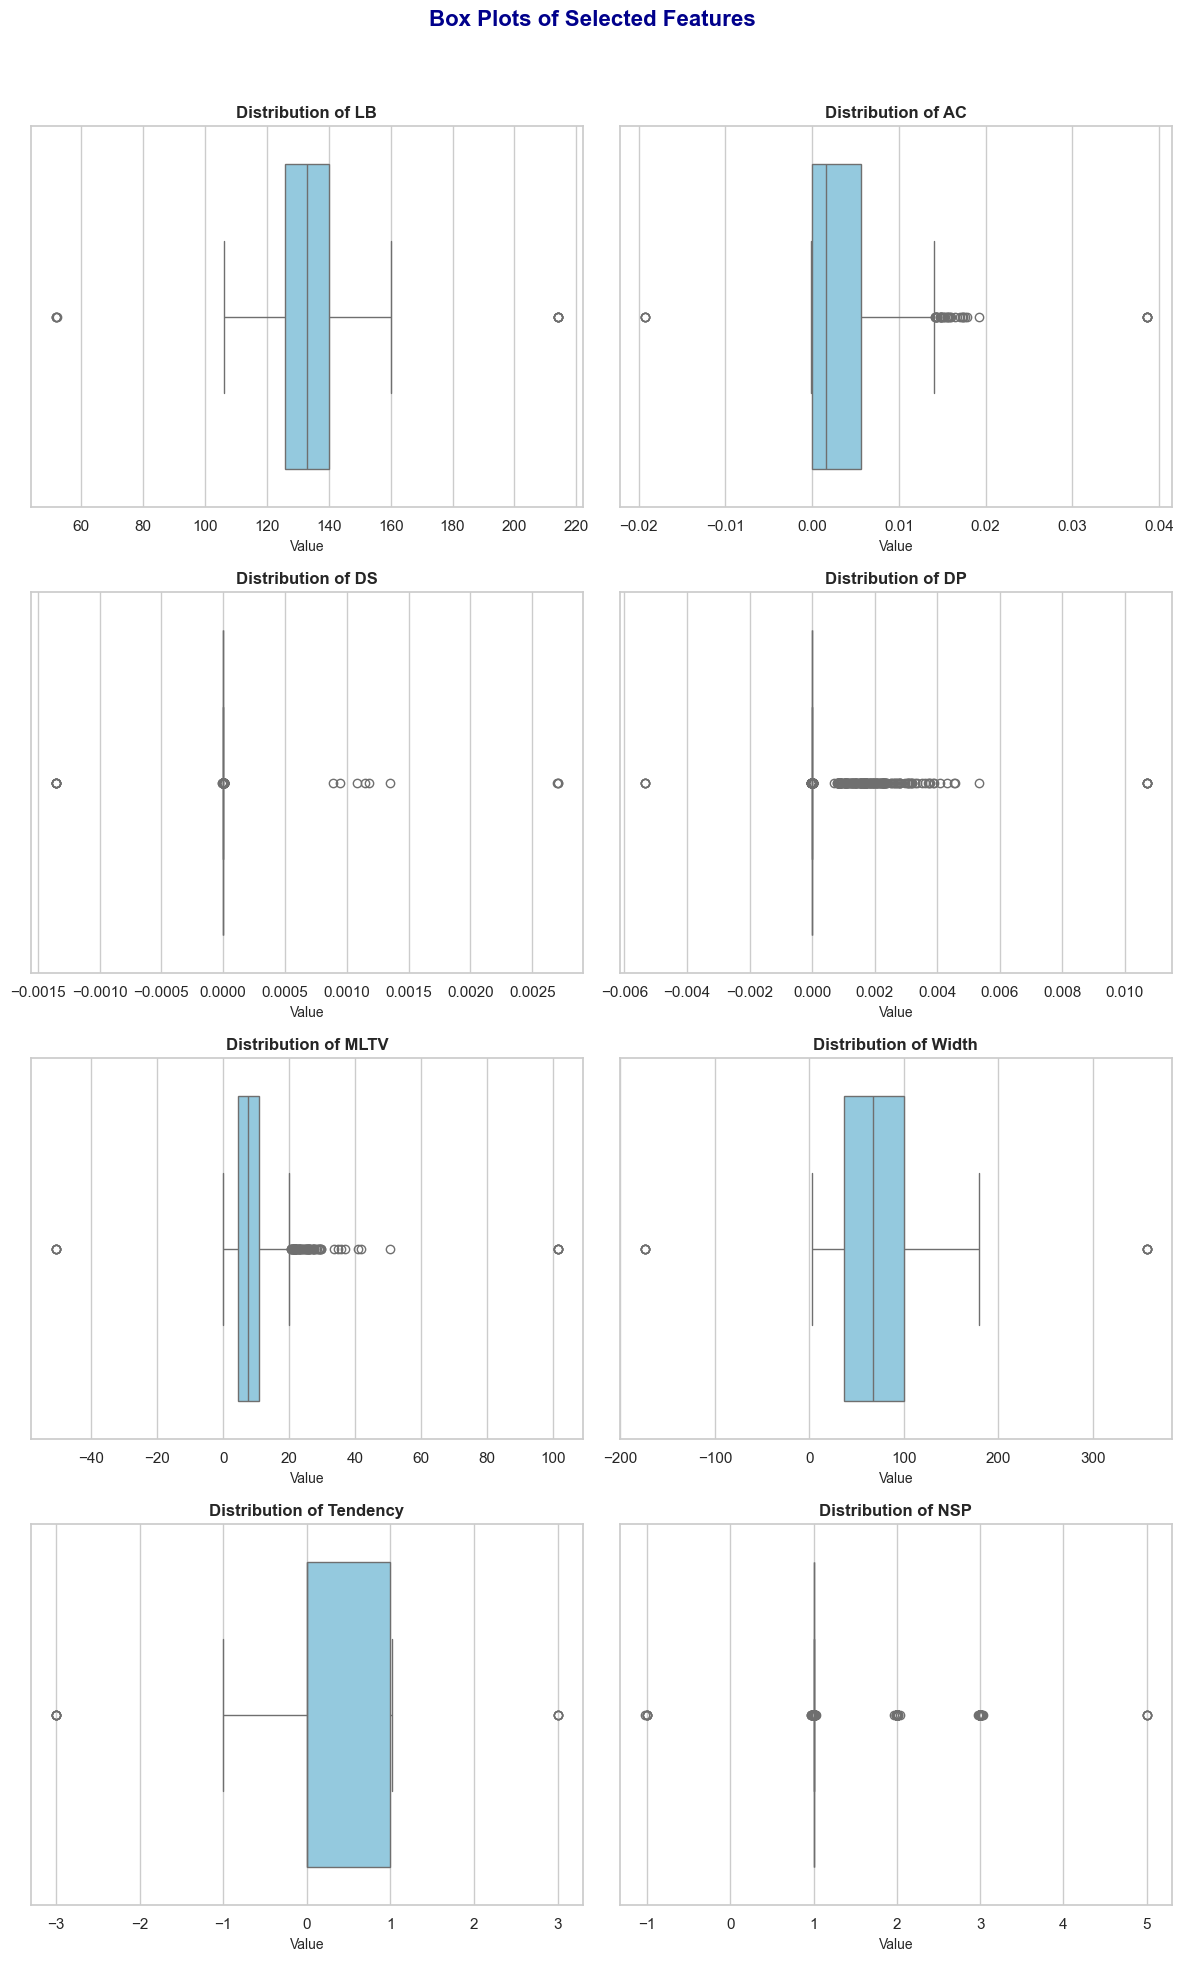

In [81]:
sns.set(style="whitegrid")
#Main figure size
plt.figure(figsize=(12, 20))

#Plot title
plt.suptitle("Box Plots of Selected Features", fontsize=16, fontweight='bold', color='darkblue')

#Loop to plot the subplots of each null features
for i, feature in enumerate(null_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f"Distribution of {feature}", fontsize=12, fontweight='semibold')   
    plt.xlabel("Value", fontsize=10)
    plt.ylabel("")
    plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

---
## Observations 

- Every null feature have outliers,
- so it will me more feasible to use median to replace the null values rather than using mean.

---

## Replacing the null values of all the fetures in null_features

In [82]:
# Loop over each feature with missing values (null features)
for feature in null_features:
    # Calculate the median of the current feature
    median = df[feature].median()
    
    # Replace the null values with the median of the feature
    df[feature].fillna(median, inplace=True)
    
    print(f"\nReplaced null values in '{feature}' with the median value: {median}")
    print('-' * 60)



Replaced null values in 'LB' with the median value: 133.0
------------------------------------------------------------

Replaced null values in 'AC' with the median value: 0.001633991
------------------------------------------------------------

Replaced null values in 'DS' with the median value: 0.0
------------------------------------------------------------

Replaced null values in 'DP' with the median value: 0.0
------------------------------------------------------------

Replaced null values in 'MLTV' with the median value: 7.4
------------------------------------------------------------

Replaced null values in 'Width' with the median value: 67.0
------------------------------------------------------------

Replaced null values in 'Tendency' with the median value: 0.0
------------------------------------------------------------

Replaced null values in 'NSP' with the median value: 1.0
------------------------------------------------------------


In [83]:
df[null_features].isnull().sum()

LB          0
AC          0
DS          0
DP          0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

---
## Observations:
- Replaced null values successfully

---

## Outliers detection and Handling

In [84]:
# Loop through each columns
for feature in df.columns:  
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers in the feature
        outlier_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        
        print(f"\nFeature: {feature} has {outlier_count} outliers.")
        print('-' * 60)


Feature: LB has 10 outliers.
------------------------------------------------------------

Feature: AC has 43 outliers.
------------------------------------------------------------

Feature: FM has 347 outliers.
------------------------------------------------------------

Feature: UC has 13 outliers.
------------------------------------------------------------

Feature: DL has 125 outliers.
------------------------------------------------------------

Feature: DS has 120 outliers.
------------------------------------------------------------

Feature: DP has 284 outliers.
------------------------------------------------------------

Feature: ASTV has 10 outliers.
------------------------------------------------------------

Feature: MSTV has 80 outliers.
------------------------------------------------------------

Feature: ALTV has 318 outliers.
------------------------------------------------------------

Feature: MLTV has 81 outliers.
-----------------------------------------------

---
## Observations:
- Except few features, most of them have large number of outliers.
- So, simply dropping them won't be a feasible option
- We have to handle this outliers rather dropping them

---

In [85]:
#Loop over each features
for feature in df.columns:
    #Calculate 25th percentile
    Q1 = df[feature].quantile(0.25)
    
    #Calculate 75th percentile
    Q3 = df[feature].quantile(0.75)
    
    #Calculate Inter Quatile Range
    IQR = Q3 - Q1
        
    # Calculate the lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    # Apply capping
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    
    print(f"\nReplaced the values of '{feature}' which are smaller than {lower_bound} by '{lower_bound}'\nReplaced the values of '{feature}' which greater than {upper_bound} by '{upper_bound}'")
    print('-' * 60)


Replaced the values of 'LB' which are smaller than 105.0 by '105.0'
Replaced the values of 'LB' which greater than 161.0 by '161.0'
------------------------------------------------------------

Replaced the values of 'AC' which are smaller than -0.00840919125 by '-0.00840919125'
Replaced the values of 'AC' which greater than 0.01401531875 by '0.01401531875'
------------------------------------------------------------

Replaced the values of 'FM' which are smaller than -0.003849856875 by '-0.003849856875'
Replaced the values of 'FM' which greater than 0.006416428125 by '0.006416428125'
------------------------------------------------------------

Replaced the values of 'UC' which are smaller than -0.005177445124999999 by '-0.005177445124999999'
Replaced the values of 'UC' which greater than 0.013563983874999998 by '0.013563983874999998'
------------------------------------------------------------

Replaced the values of 'DL' which are smaller than -0.004934211 by '-0.004934211'
Replace

## Checking If outliers have been handled or not

In [86]:
# Loop through each columns
for feature in df.columns:  
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers in the feature
        outlier_count = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        
        print(f"\nFeature: {feature} has {outlier_count} outliers.")
        print('-' * 60)


Feature: LB has 0 outliers.
------------------------------------------------------------

Feature: AC has 0 outliers.
------------------------------------------------------------

Feature: FM has 0 outliers.
------------------------------------------------------------

Feature: UC has 0 outliers.
------------------------------------------------------------

Feature: DL has 0 outliers.
------------------------------------------------------------

Feature: DS has 0 outliers.
------------------------------------------------------------

Feature: DP has 0 outliers.
------------------------------------------------------------

Feature: ASTV has 0 outliers.
------------------------------------------------------------

Feature: MSTV has 0 outliers.
------------------------------------------------------------

Feature: ALTV has 0 outliers.
------------------------------------------------------------

Feature: MLTV has 0 outliers.
------------------------------------------------------------

F

---
## Observations:
- Handled the outliers successfully

---

## 2.  Statistical Summary

In [87]:
summary = pd.DataFrame()

# Calculating measures of central tendency
summary['Mean'] = df.mean()
summary['Median'] = df.median()

# Calculating measures of dispersion
summary['Standard Deviation'] = df.std()
summary['Interquartile Range (IQR)'] = df.quantile(0.75) - df.quantile(0.25)

In [88]:
summary

Mean      Median  Standard Deviation  \
LB        133.290331  133.000000            9.930268   
AC          0.003132    0.001634            0.003828   
FM          0.001568    0.000000            0.002485   
UC          0.004362    0.004484            0.003001   
DL          0.001770    0.000000            0.002668   
DS          0.000000    0.000000            0.000000   
DP          0.000000    0.000000            0.000000   
ASTV       46.981873   49.000000           17.612745   
MSTV        1.304644    1.200000            0.781091   
ALTV        6.691678    0.000000           10.378400   
MLTV        8.007471    7.400000            5.047078   
Width      70.287203   67.000000           39.571995   
Tendency    0.316537    0.000000            0.622406   
NSP         1.000000    1.000000            0.000000   

          Interquartile Range (IQR)  
LB                        14.000000  
AC                         0.005606  
FM                         0.002567  
UC                         0.004685  
DL                         0.003289  
DS                         0.000000  
DP                         0.000000  
ASTV                      29.000000  
MSTV                       1.000000  
ALTV                      11.000000  
MLTV                       6.200000  
Width                     63.000000  
Tendency                   1.000000  
NSP                        0.000000

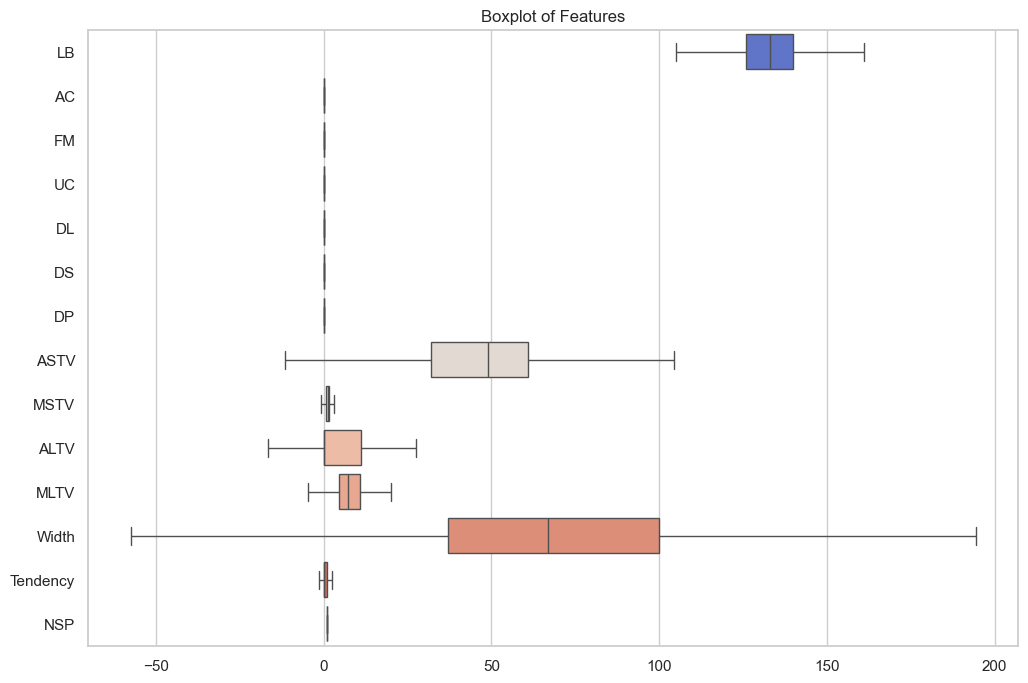

In [89]:
# Plotting boxplots for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h", palette="coolwarm")
plt.title('Boxplot of Features')
plt.show()

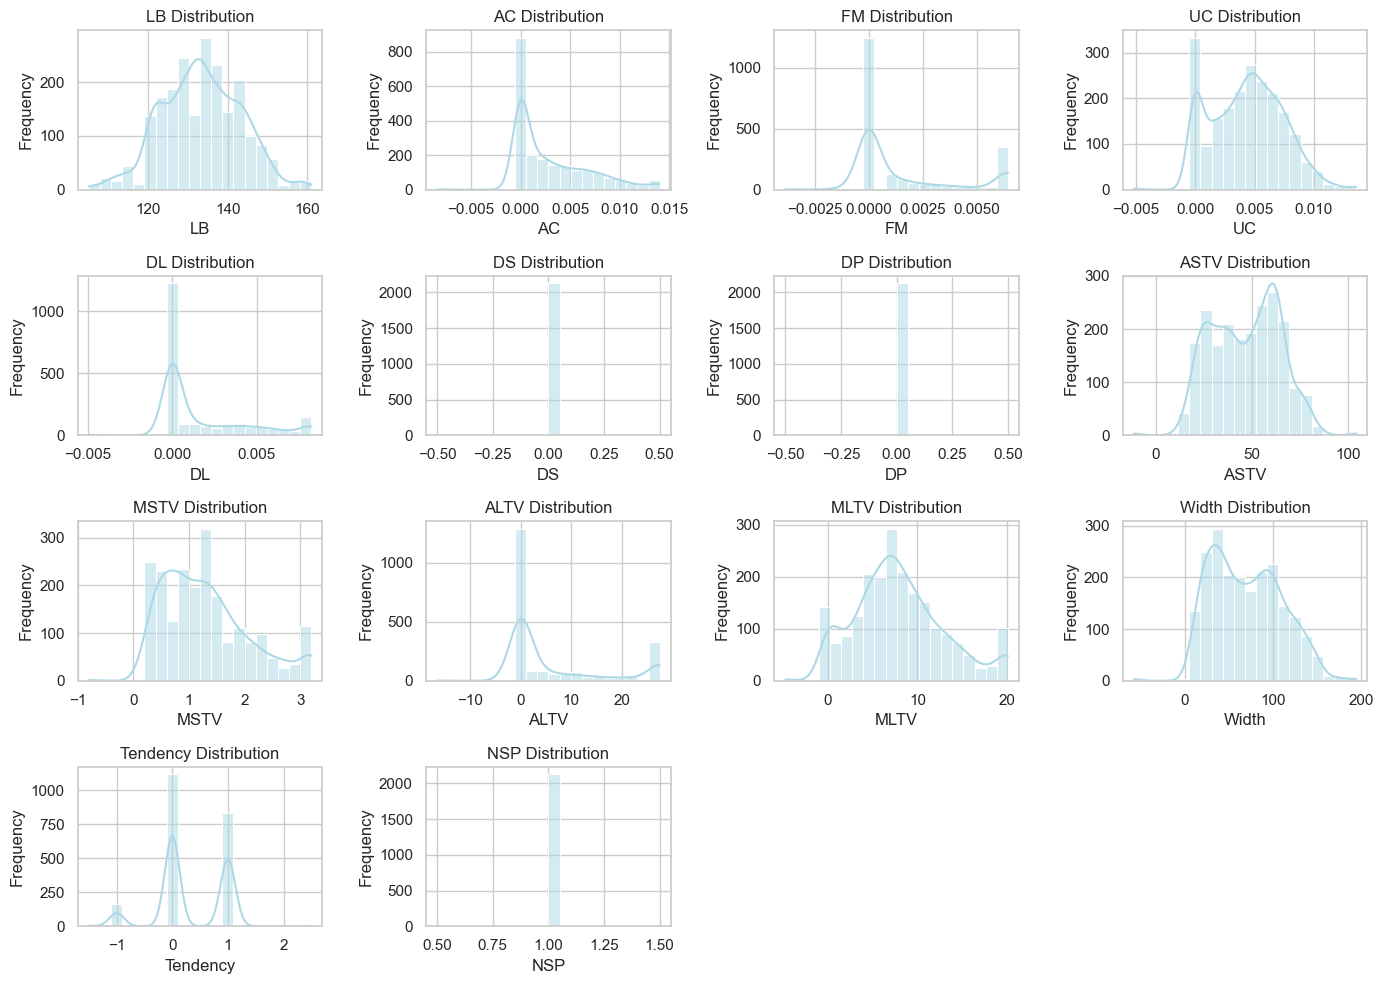

In [90]:
# Plotting histograms for each feature in the DataFrame
plt.figure(figsize=(14, 10))

# Loop through each feature to create histograms
for i, feature in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.histplot(df[feature], kde=True, color='lightblue', bins=20)  
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Analysis of Feature Distributions and Summary Statistics

---

### 1. **Distribution of Features**  
The histograms and boxplots reveal significant variation in the distributions of the features:

- **LB (Fetal Heart Rate):**  
  - Normal distribution centered around a mean of **133.29 bpm**.
  - Slightly skewed but no extreme outliers.
  
- **AC, FM, UC, DL (Acceleration, Fetal Movement, Uterine Contractions, and Deceleration):**  
  - These features are heavily right-skewed.
  - **AC, FM, DL** have several data points concentrated around zero.
  
- **DS & DP (Derivatives of Signal):**  
  - Constant value of zero, indicating no variance.
  
- **ASTV (Percentage of Accelerative Signals):**  
  - Relatively uniform distribution centered at **46.98%** with a wide spread.

- **MSTV (Mean Value of Short Term Variability):**  
  - Slightly skewed, with a mean of **1.30**. Most values are between 0 and 2.5.

- **ALTV & MLTV (Long-Term Variability):**  
  - **ALTV** exhibits heavy skewness with median = 0.
  - **MLTV** has a broader spread and peaks around **7.4**.

- **Width:**  
  - Broad distribution with some extreme outliers. Mean = **70.28**.
  
- **Tendency:**  
  - Most values lie around 0 (mean **0.32**). Skewed with occasional positive outliers.

- **NSP (Fetal State Class):**  
  - Constant value = **1**, suggesting all observations belong to the same class (Normal).

---

### 2. **Summary Statistics**  

| **Metric**       | **Key Observations**                                                                 |
|------------------|---------------------------------------------------------------------------------------|
| **Mean & Median** | Minimal difference between the mean and median for most features indicates low skewness except in highly skewed variables (e.g., ALTV, AC). |
| **Standard Deviation** | High for features like **Width** (**39.57**) and **ASTV** (**17.61**), showing wide variability.|
| **IQR**           | Features like **Width** and **ASTV** have large interquartile ranges, showing spread between 25th and 75th percentiles. |
| **DS & DP**       | Both are constants (**0**), indicating these features may not add value for predictive analysis.|
| **NSP**           | All values fall into a single category. This might hinder classification tasks if target diversity is required. |


---

## 3.	Data Visualization:

#### 1. Histograms for Numerical Features

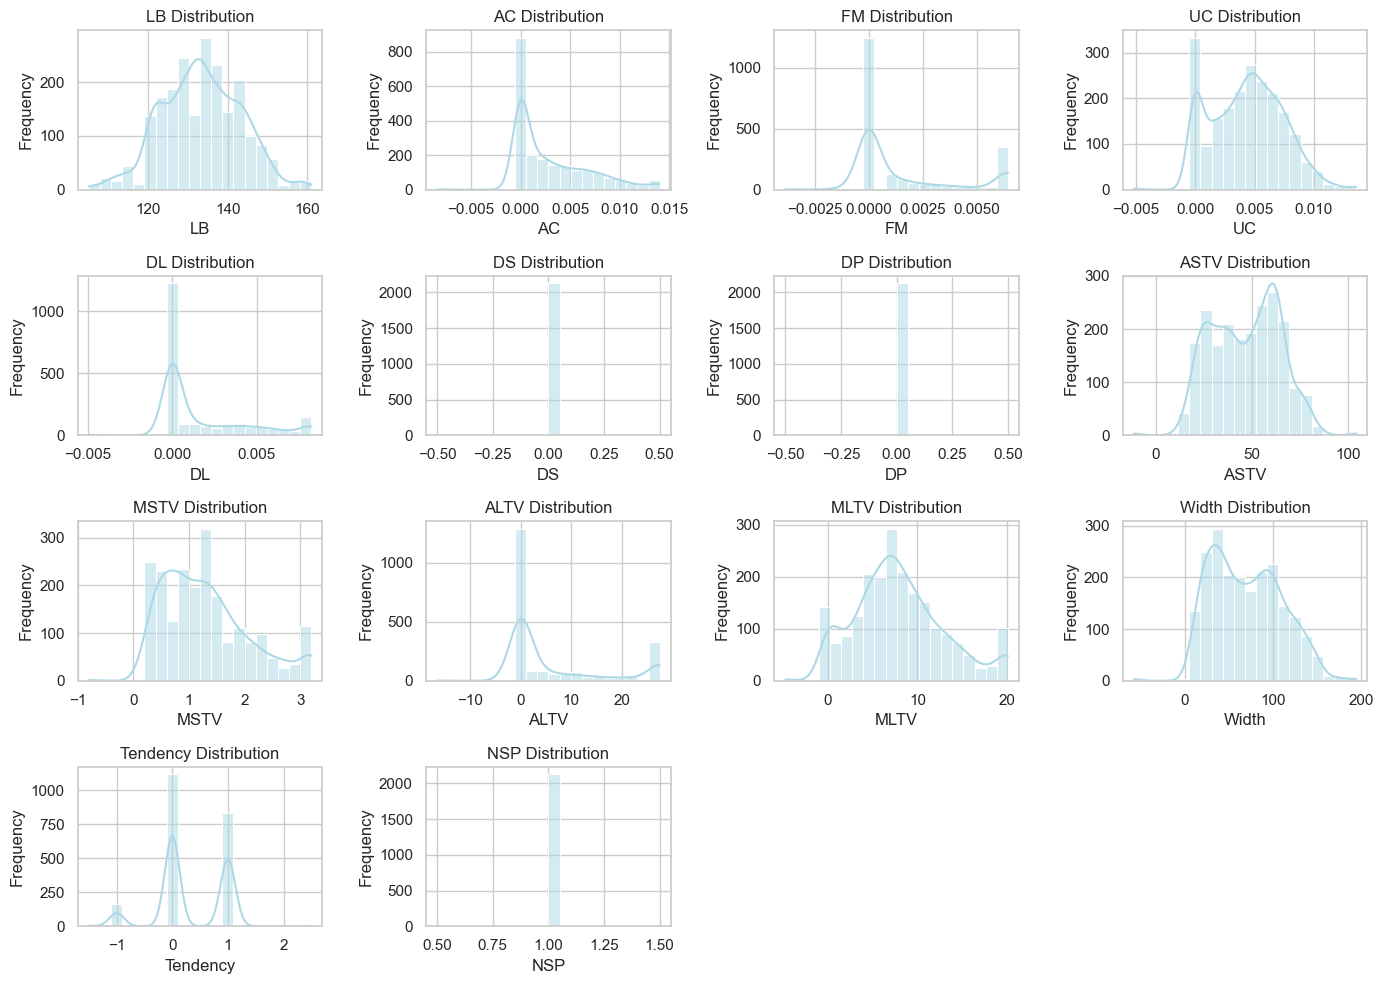

In [91]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='lightblue')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

---
### Statistical Distribution Analysis 📊

#### Overview
The image presents 14 different distribution plots showing various metrics, each with unique characteristics and patterns. Let's break down the most notable observations.

#### Key Distributions 🔍

##### Bimodal Patterns
- **Tendency Distribution**: Shows a striking bimodal pattern with two distinct peaks at 0 and 1
- **UC Distribution**: Exhibits a bimodal structure with peaks around 0 and 0.005
- **Width Distribution**: Displays two prominent peaks around 50 and 100 units

##### Normal-like Distributions
- **LB Distribution**: Approximately normal with mean around 135-140
- **ASTV Distribution**: Right-skewed bell curve centered around 60-70
- **MLTV Distribution**: Right-skewed with peak around 8-10

##### Spike Patterns ⚡
- **DS & DP Distributions**: Extremely concentrated around 0 with minimal variance
- **NSP Distribution**: Sharp spike at 1.0, indicating a highly standardized metric
- **ALTV Distribution**: Primary spike near 0 with a small secondary peak at higher values

##### Asymmetric Distributions
- **AC Distribution**: Right-skewed with a sharp peak near 0
- **FM Distribution**: Right-skewed with a distinctive tail
- **DL Distribution**: Sharp central peak with asymmetric tails

#### Statistical Implications 📈

1. **Data Quality**
   - Most metrics show well-defined patterns suggesting reliable data collection
   - The presence of sharp spikes in several distributions indicates precise measurement systems

2. **Process Control**
   - Metrics like DS, DP, and NSP suggest tight process controls
   - Bimodal distributions might indicate two distinct operational states or conditions

3. **Variability Assessment**
   - Width and ASTV show considerable spread, indicating more variable processes
   - LB distribution suggests a stable process with natural variation

---

### 2. Boxplots for Numerical Features

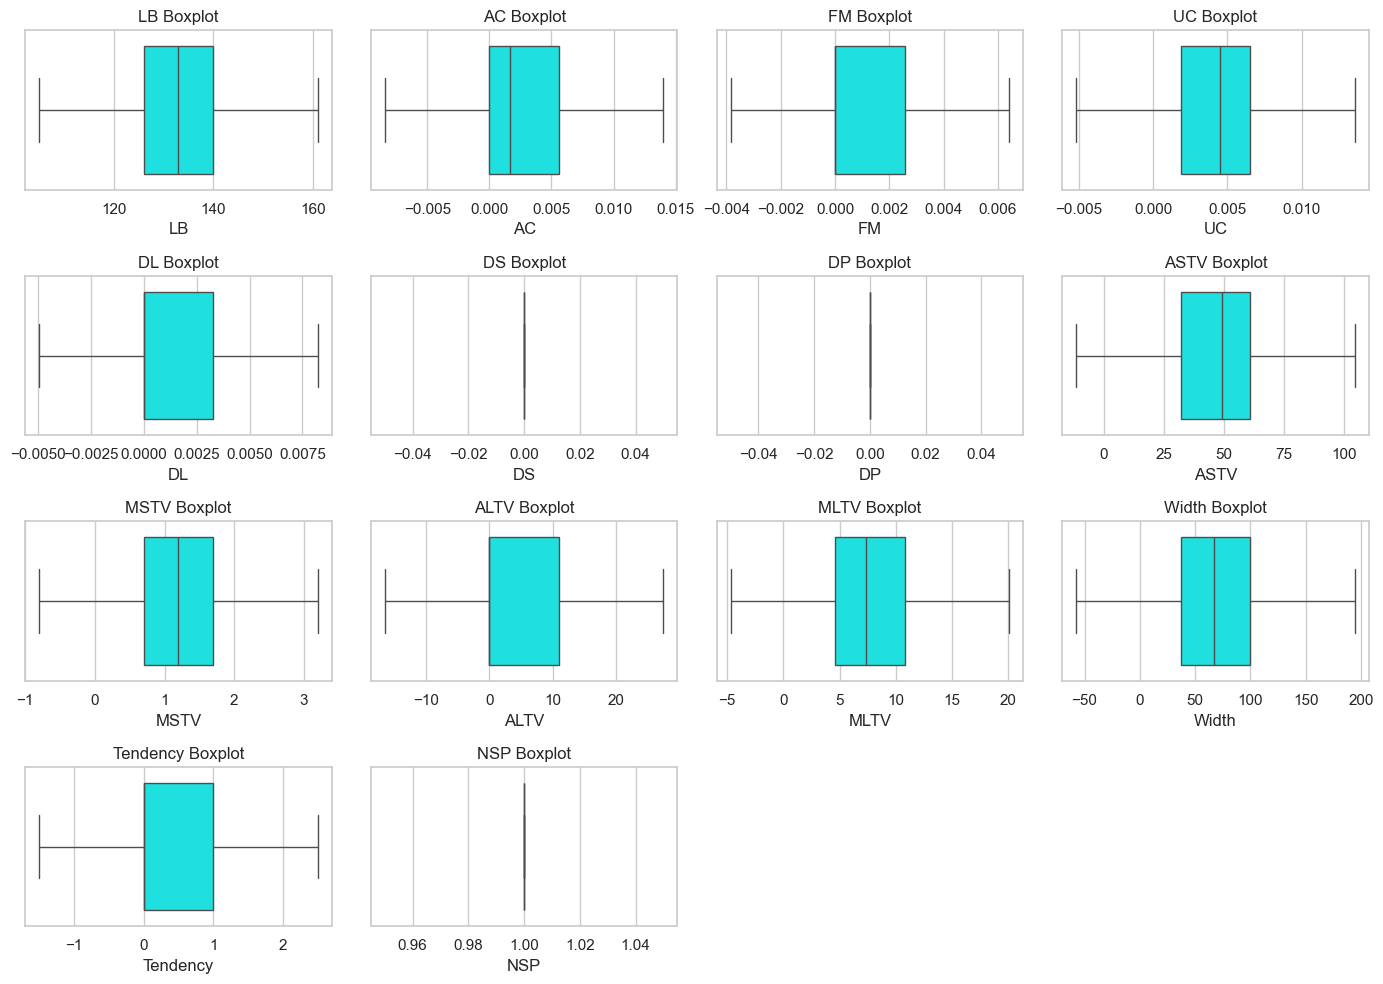

In [ ]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[feature], color='cyan')
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

---
### Box Plot Analysis of Statistical Distributions 📊

#### Overview
The image displays 14 box plots representing different metrics, providing insights into data distribution, spread, and potential outliers. Let's analyze the key characteristics.

#### Detailed Analysis 🔍

##### Spread and Central Tendency

###### High Spread Metrics
- **Width**: Shows substantial spread (0-200), with median around 75
- **ASTV**: Notable spread (0-100), median approximately at 50  
- **LB**: Considerable range (120-160), centered around 140
- **MLTV**: Wide range (-5 to 20), median near 7-8

##### Low Spread Metrics
- **DS & DP**: Extremely tight distribution around 0
- **NSP**: Highly concentrated near 1.00
- **AC & FM**: Narrow spread around 0

##### Symmetry Analysis 📐

##### Symmetric Distributions
- **LB**: Nearly symmetric box with equal whiskers
- **MSTV**: Relatively symmetric around median
- **UC**: Balanced distribution around central value

##### Asymmetric Distributions
- **ALTV**: Shows slight right skewness
- **DL**: Exhibits some asymmetry
- **Tendency**: Notable asymmetry in box size

#### Key Observations 🎯

1. **Distribution Types**
  - Most metrics show reasonable symmetry
  - Few extreme outliers visible
  - Several metrics concentrated around specific values

2. **Quality Indicators**
  - Consistent patterns suggest reliable measurements
  - Well-defined boxes indicate good data resolution
  - Clear medians show central tendency stability

3. **Process Implications**
  - Tight distributions (DS, DP, NSP) suggest controlled processes
  - Wider distributions might indicate natural variation
  - Few outliers suggest stable processes

#### Statistical Implications 📈

1. **Control Limits**
  - Most parameters well within expected ranges
  - Whiskers indicate reasonable process limits
  - Box sizes suggest appropriate process variability

2. **Process Stability**
  - Consistent box sizes across related metrics
  - Well-defined medians indicate stable central tendencies
  - Proportional whiskers suggest natural variation

---

### 3. Correlation Heatmap for Numerical Variables

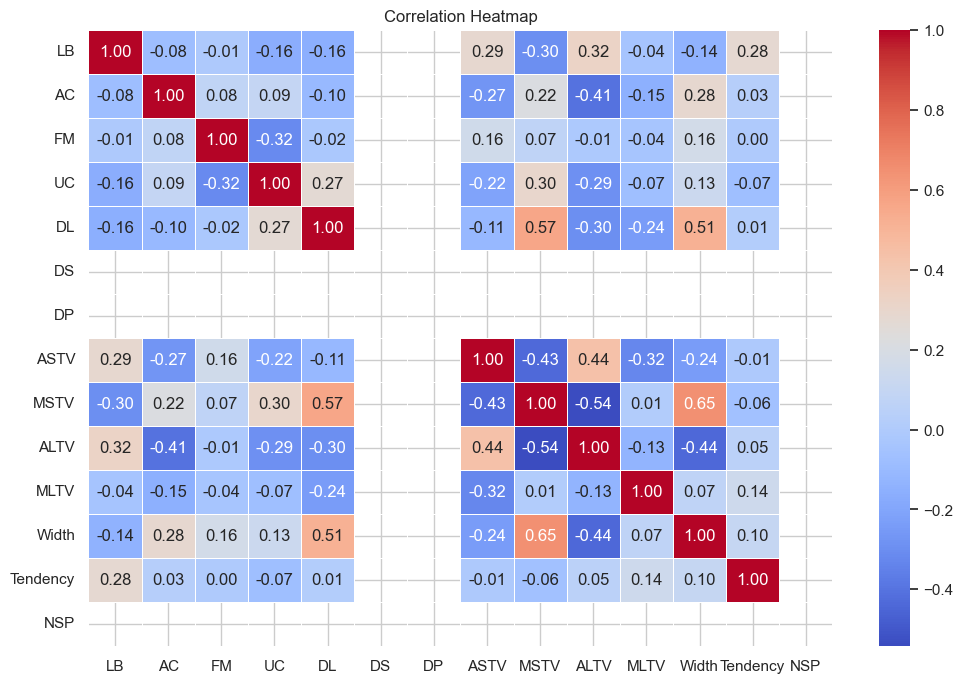

In [93]:

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

---
### Correlation Heatmap Analysis 🔍

#### Overview
This correlation heatmap visualizes the relationships between various metrics, using a color scale from dark blue (strong negative correlation) to dark red (strong positive correlation).

#### Strong Correlations (|r| ≥ 0.5) 🔥

#### Positive Correlations
1. **DL & Width** (r = 0.51)
  - Moderate positive relationship
  - Suggests interconnected parameters

2. **DL & MSTV** (r = 0.57)
  - Indicates linked variation
  - Potentially related processes

3. **MSTV & Width** (r = 0.65)
  - Strongest positive correlation besides self-correlations
  - Shows significant relationship between measurements

#### Negative Correlations
1. **MSTV & ALTV** (r = -0.54)
  - Moderate inverse relationship
  - Suggests opposing trends

#### Moderate Correlations (0.3 ≤ |r| < 0.5) 📊

#### Notable Patterns
- **AC & ALTV**: r = -0.41
- **ASTV & MSTV**: r = -0.43
- **ASTV & ALTV**: r = 0.44
- **Width & ALTV**: r = -0.44

#### Weak or No Correlations (|r| < 0.3) 💫

#### Key Observations
1. **Most LB Relationships**
  - Generally weak correlations with other metrics
  - Suggests independent behavior

2. **Tendency Metric**
  - Shows very weak correlations overall
  - Highest correlation is 0.28 with LB

#### Special Notes 📝

1. **Missing Correlations**
  - DS & DP show no correlation values
  - NSP has limited correlation data

2. **Diagonal Values**
  - Perfect self-correlations (1.00) as expected
  - Validates data integrity

#### Implications for Analysis 🎯

1. **Clustered Relationships**
  - MSTV, Width, and DL form a correlated group
  - ASTV and ALTV show consistent moderate correlations

2. **Independent Metrics**
  - Several metrics show independence
  - Useful for separate analysis purposes

---

### 4. Pair Plot (for multiple numerical variables)

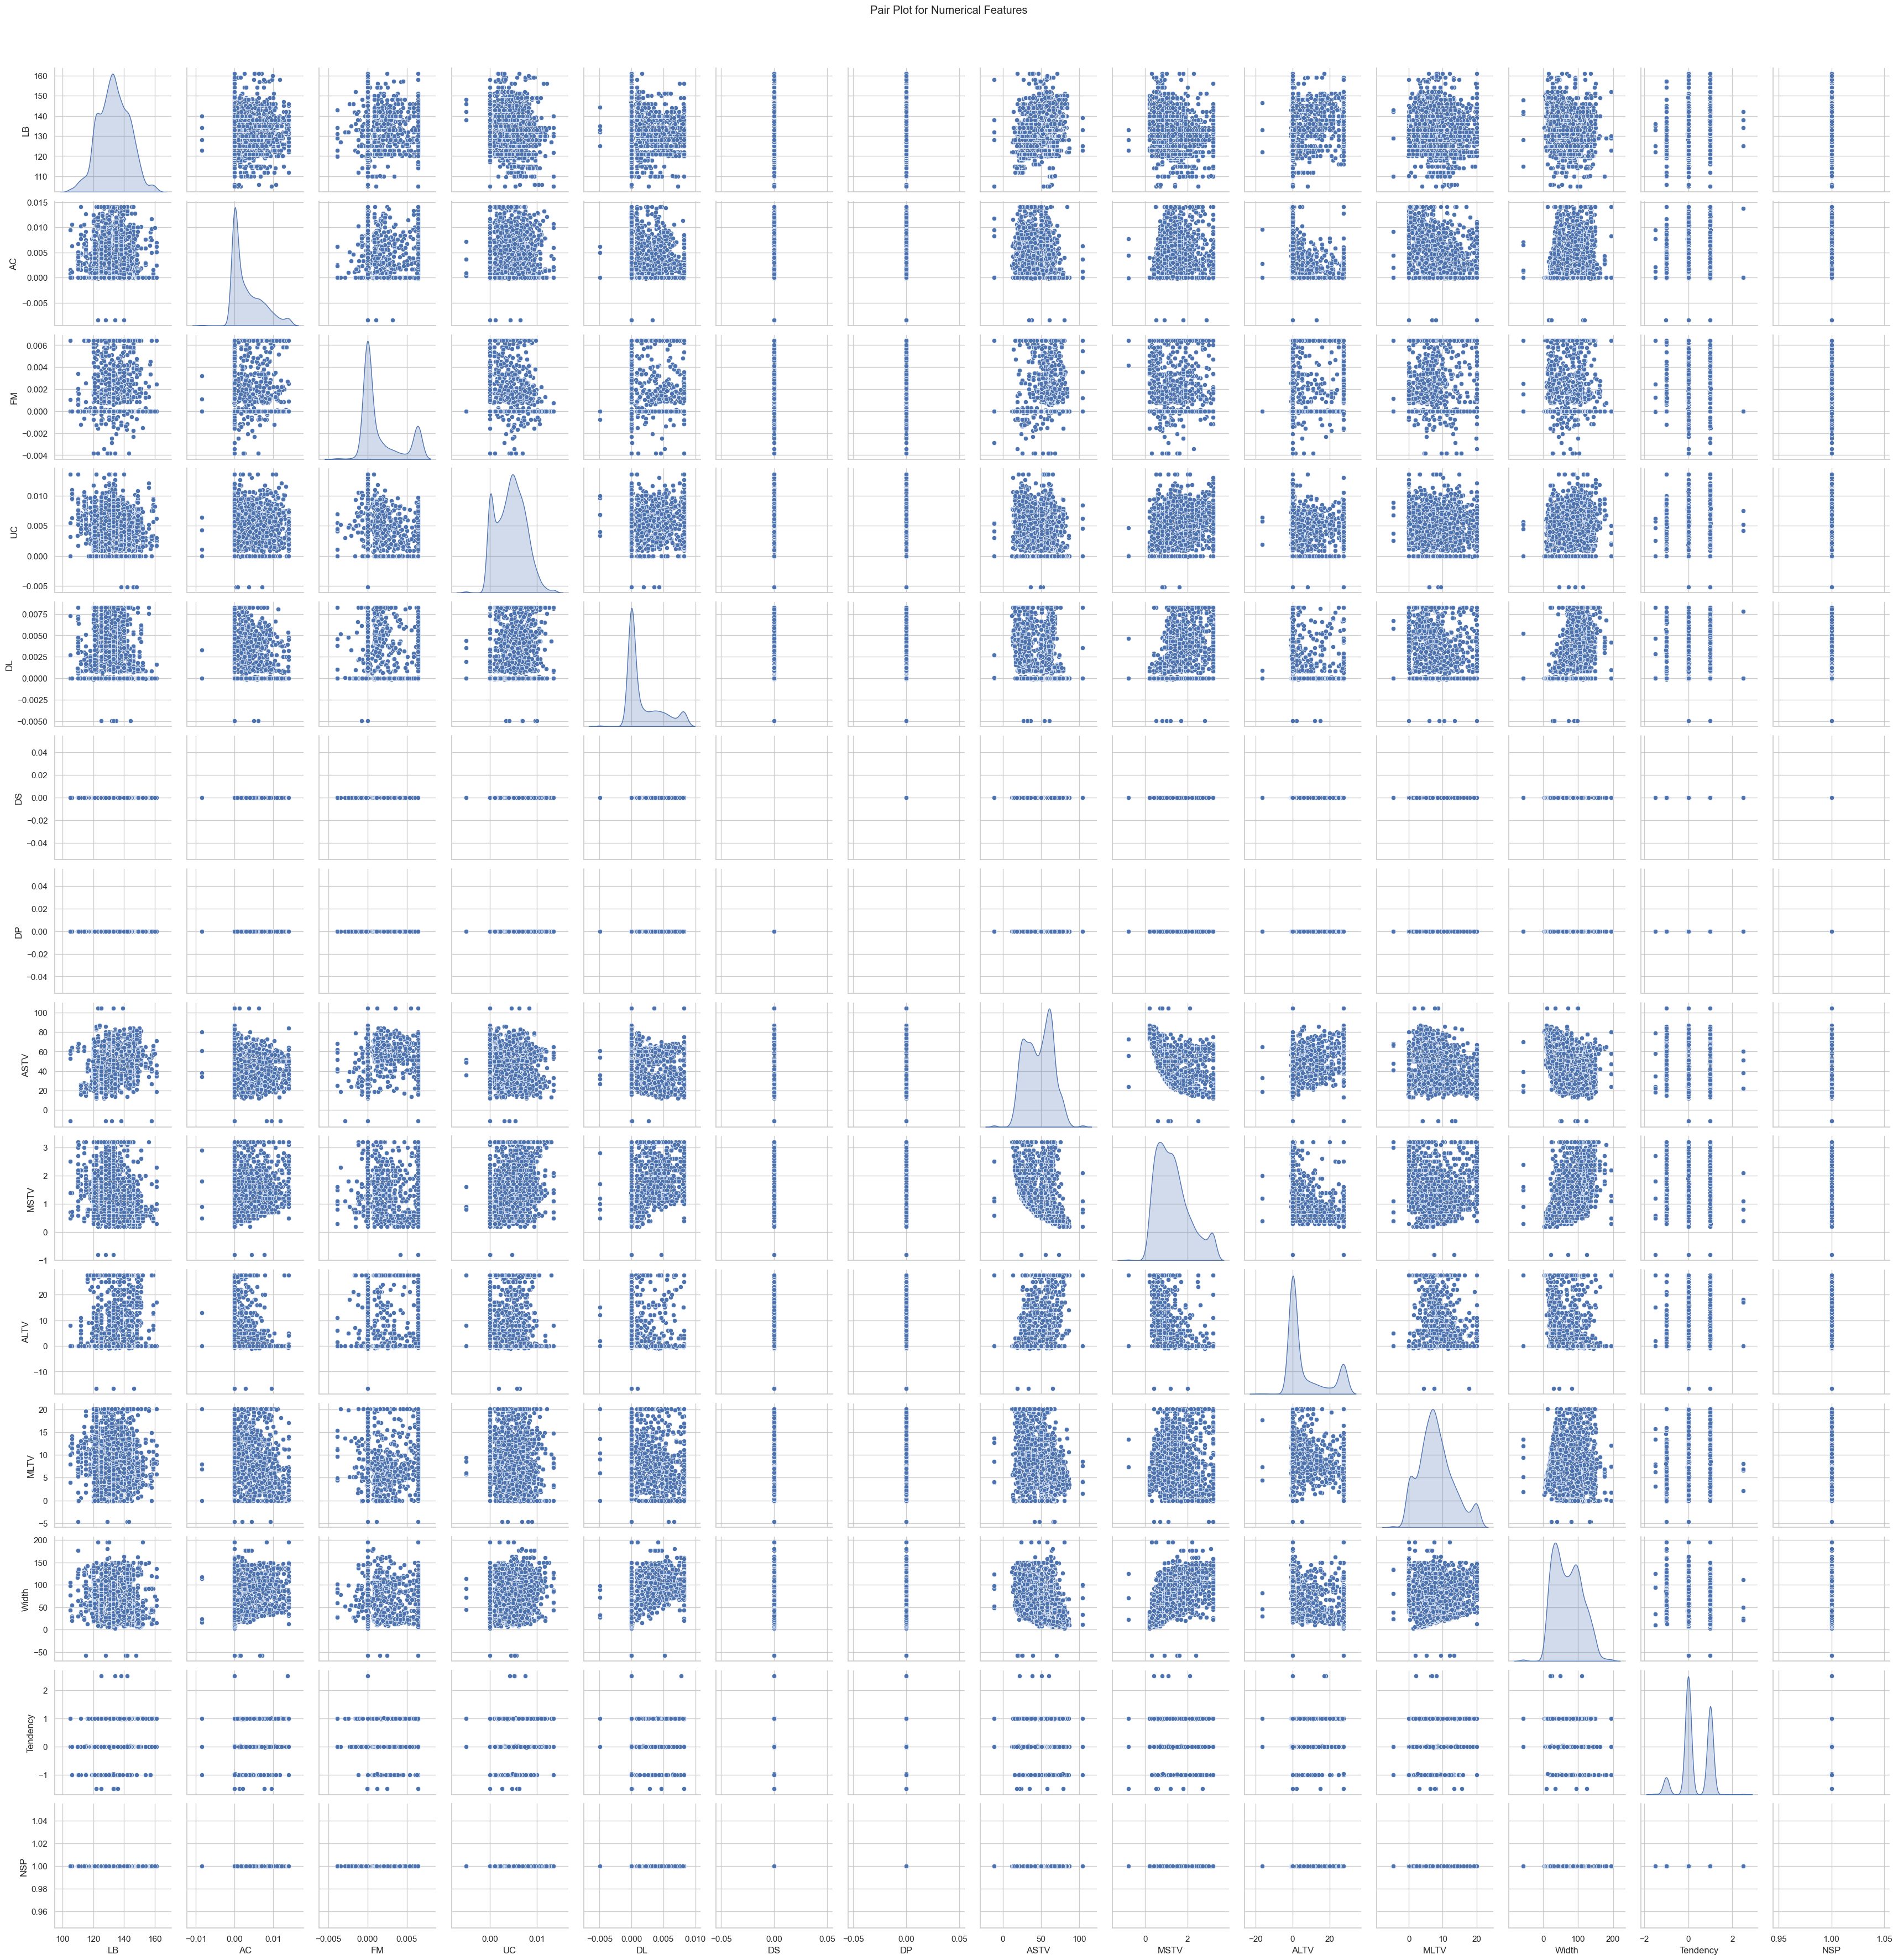

In [94]:
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

---
### Pair Plot Analysis of Numerical Features 📊

#### Overview
This comprehensive pair plot matrix shows relationships between multiple variables through scatter plots, distributions, and correlations. The diagonal shows distribution plots while off-diagonal elements show scatter plots between pairs of variables.

#### Key Pattern Analysis 🔍

#### Distribution Patterns

1. **Univariate Distributions (Diagonal)**
  - **LB**: Approximately normal distribution
  - **Tendency**: Distinct bimodal distribution
  - **ASTV**: Right-skewed distribution
  - **NSP**: Highly concentrated near 1.0

2. **Notable Scatter Plot Patterns**
  - **Strong Relationships**
    - DL & Width: Show positive correlation
    - MSTV & ALTV: Display negative correlation
  
  - **Weak/No Relationships**
    - Most LB relationships show random scatter
    - FM shows minimal correlation with most variables

#### Cluster Analysis 🎯

#### Notable Clustering Patterns

1. **Dense Clusters**
  - Several variables show concentrated data points
  - Notable in DS and DP relationships

2. **Dispersed Patterns**
  - Width shows spread-out relationships
  - ASTV displays scattered patterns

#### Special Observations 📈

1. **Outliers**
  - Visible in several relationships
  - Most prominent in ALTV relationships

2. **Linear Trends**
  - Few strong linear relationships
  - Some weak linear patterns visible

#### Variable Relationships 🔗

#### Strong Interactions
1. **Positive Correlations**
  - Width & MSTV
  - DL & MSTV

#### Weak Interactions
1. **Random Patterns**
  - Most LB relationships
  - FM with other variables

#### Technical Insights 💡

1. **Data Quality**
  - Generally good spread of data
  - Few extreme outliers
  - Complete data coverage

2. **Distribution Types**
  - Mix of normal and non-normal
  - Some highly skewed
  - Several multimodal

---

### 5. Density Plot

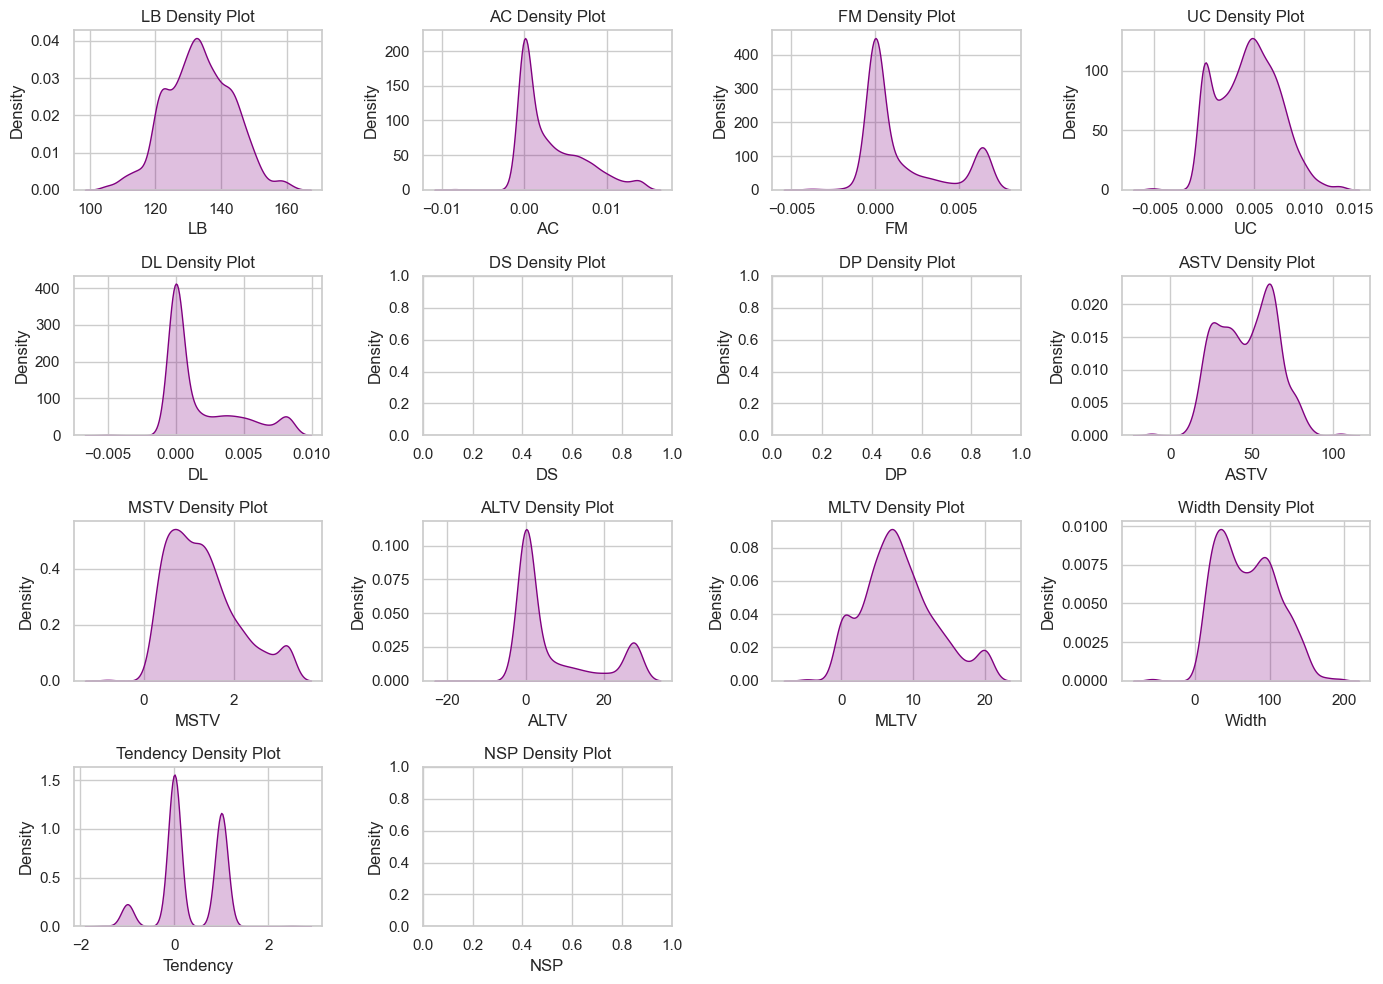

In [95]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df[feature], fill=True, color='purple')
    plt.title(f'{feature} Density Plot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

---
### Distribution Analysis of Various Metrics

#### Key Observations

#### Shape Patterns
* Several distributions show **bimodal characteristics**, notably:
  * UC (Upper Control) density plot
  * ASTV (Abnormal Short Term Variability)
  * Width measurements
  * Tendency measurements show clear bimodal distribution with sharp peaks

#### Normal vs Skewed Distributions
1. **Approximately Normal Distributions:**
  * LB (Baseline FHR) shows roughly normal distribution centered around 140
  * MSTV (Mean Short Term Variability) appears normally distributed with slight right skew

2. **Highly Skewed Distributions:**
  * AC (Accelerations) shows strong right skew
  * DL (Light Decelerations) exhibits extreme right skew with a sharp peak near zero
  * FM (Fetal Movements) displays right skew with secondary peak

#### Specific Metrics Analysis

#### Fetal Heart Rate Characteristics
* **Baseline (LB)**: Centers around 120-160 bpm, typical healthy range
* **UC (Uterine Contractions)**: Shows dual peaks suggesting distinct patterns of contraction frequency
* **ALTV/MLTV**: Both variables show asymmetric distributions with longer right tails

#### Variability Measures
* **ASTV**: Shows complex multi-modal distribution between 50-100 units
* **Width**: Distribution suggests two common width patterns, possibly indicating different fetal states

#### Missing or Sparse Data
* **DS (Deep Sleep) Plot**: Appears empty or without significant data points
* **DP Plot**: Similarly shows no clear distribution pattern
* **NSP Plot**: Lacks visible distribution pattern

---

### 6. QQ (Quantile-Quantile) Plot

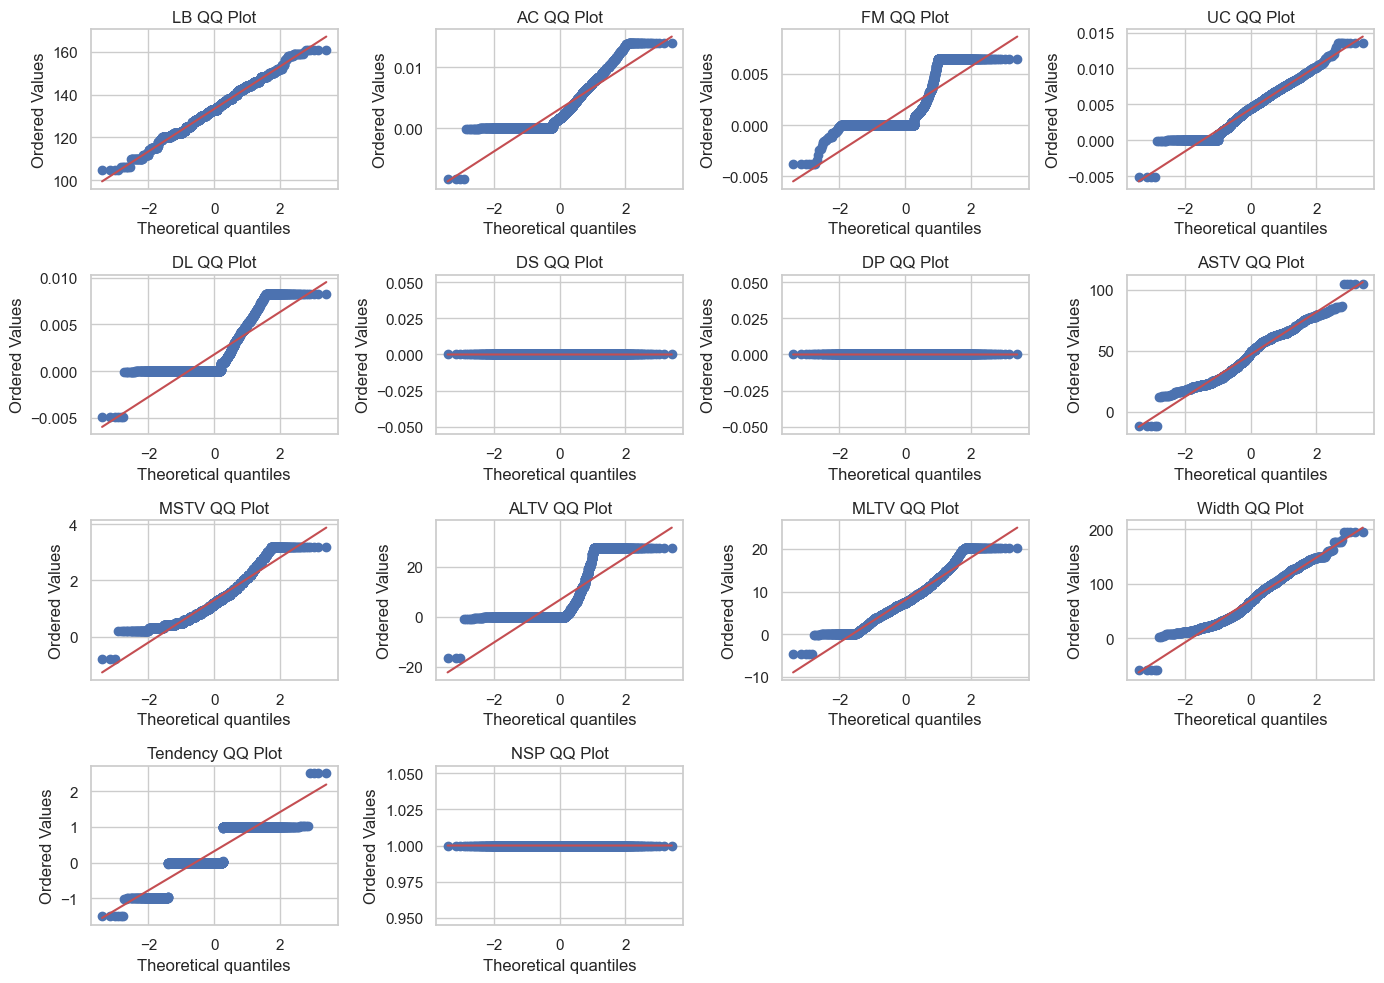

In [96]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    stats.probplot(df[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'{feature} QQ Plot')
    
plt.tight_layout()
plt.show()

---
### Q-Q Plot Analysis of Fetal Monitoring Data

#### Normal Distribution Alignment

#### Strong Normal Alignment
* **LB (Baseline FHR)**
  - Shows excellent alignment with theoretical normal line
  - Minor deviations at extremes
  - Range: 100-160
  
* **MLTV**
  - Good alignment throughout
  - Slight deviation at upper tail
  - Range: -10 to 20

* **Width**
  - Strong alignment with normal distribution
  - Minor deviation at tails
  - Range: 0-200

#### Moderate Normal Alignment
* **ASTV**
  - Generally follows normal line
  - Some deviation at upper tail
  - Range: 0-100

* **MSTV**
  - Reasonable alignment in middle range
  - Deviations at both tails
  - Range: 0-4

#### Non-Normal Distributions

#### Step-like Patterns
* **AC (Accelerations)**
  - Clear step pattern
  - Large flat region near zero
  - Sharp increase at upper end
  
* **UC (Uterine Contractions)**
  - Similar step pattern to AC
  - Extended flat region
  - Rapid increase at higher values

#### Discrete/Special Patterns
* **Tendency**
  - Shows distinct horizontal segments
  - Three clear levels
  - Non-continuous distribution

#### Zero-Inflated/Constant Patterns
* **DS (Deep Sleep)**
  - Almost completely flat line
  - Minimal variation
  - Suggests constant values

* **DP**
  - Horizontal line at zero
  - No variation observed
  - Indicates single-value distribution

* **NSP**
  - Flat pattern around 1.0
  - Very limited variation
  - Suggests constant values

#### Key Insights
1. Several variables (**LB**, **Width**, **MLTV**) closely follow normal distributions
2. Many measurements show zero-inflation or step patterns
3. Some metrics (**DS**, **DP**, **NSP**) show almost no variation
4. Non-linear patterns suggest complex underlying physiological processes

---

# 4.	Pattern Recognition and Insights:

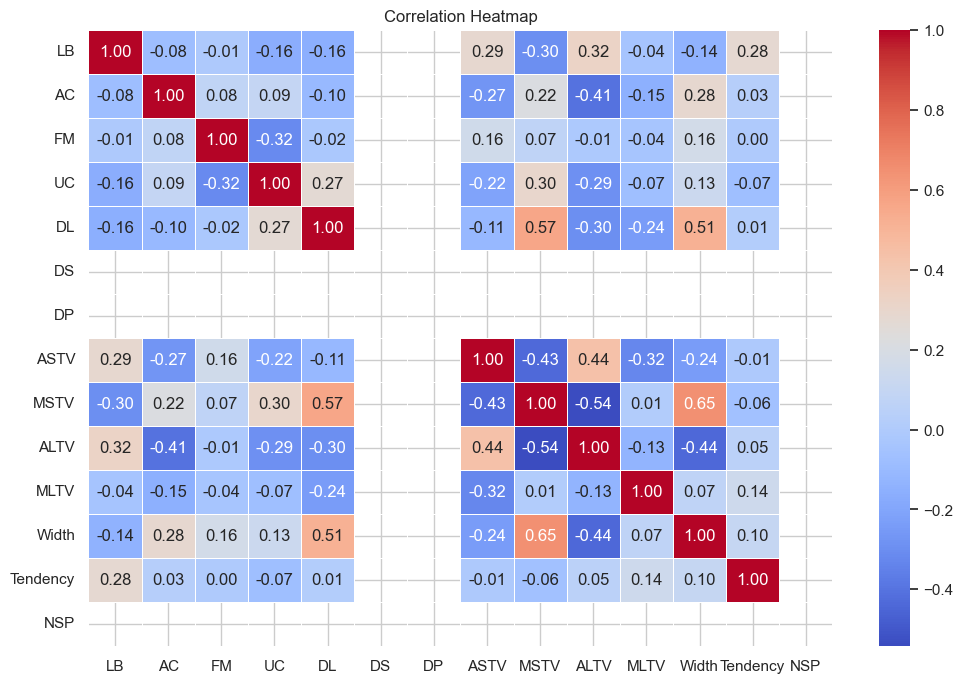

In [97]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

---
### Correlation Heatmap Analysis 🔍

#### Overview
This correlation heatmap visualizes the relationships between various metrics, using a color scale from dark blue (strong negative correlation) to dark red (strong positive correlation).

#### Strong Correlations (|r| ≥ 0.5) 🔥

#### Positive Correlations
1. **DL & Width** (r = 0.51)
  - Moderate positive relationship
  - Suggests interconnected parameters

2. **DL & MSTV** (r = 0.57)
  - Indicates linked variation
  - Potentially related processes

3. **MSTV & Width** (r = 0.65)
  - Strongest positive correlation besides self-correlations
  - Shows significant relationship between measurements

#### Negative Correlations
1. **MSTV & ALTV** (r = -0.54)
  - Moderate inverse relationship
  - Suggests opposing trends

#### Moderate Correlations (0.3 ≤ |r| < 0.5) 📊

#### Notable Patterns
- **AC & ALTV**: r = -0.41
- **ASTV & MSTV**: r = -0.43
- **ASTV & ALTV**: r = 0.44
- **Width & ALTV**: r = -0.44

#### Weak or No Correlations (|r| < 0.3) 💫

#### Key Observations
1. **Most LB Relationships**
  - Generally weak correlations with other metrics
  - Suggests independent behavior

2. **Tendency Metric**
  - Shows very weak correlations overall
  - Highest correlation is 0.28 with LB

#### Special Notes 📝

1. **Missing Correlations**
  - DS & DP show no correlation values
  - NSP has limited correlation data

2. **Diagonal Values**
  - Perfect self-correlations (1.00) as expected
  - Validates data integrity

---
### Observations

| **Correlation Type**         | **Feature Pairs**           | **Correlation Value** | **Implications** |
|------------------------------|-----------------------------|-----------------------|-------------------|
| **High Positive Correlations** | MSTV and Width             | 0.65                  | Indicates that as MSTV increases, Width tends to increase as well. This suggests a shared underlying factor, and using both in a model might introduce multicollinearity. |
|                              | DL and MSTV                 | 0.57                  | Implies potential dependency or shared influence between these two features. |
| **Negative Correlations**    | AC and ALT                  | -0.41                 | Higher values of AC are associated with lower values of ALT, indicating an inverse relationship. |
|                              | MSTV and ALT                | -0.54                 | Suggests opposing trends in the data, which could be useful for feature engineering. |
| **Weak or Insignificant Correlations** | FM and UC       | 0.08                  | Indicates independence between these features, as they have a near-zero correlation. |
|                              | Width and Tendency          | 0.03                  | Very low correlation, implying little to no linear relationship. |
| **Correlation with Target Variable (NSP)** | Tendency and NSP | 0.14              | Shows a slight association with NSP, but likely not strong enough to be a dominant predictor. |

### Potential Implications

- **Multicollinearity**: High correlations, like between **MSTV and Width**, may lead to multicollinearity in regression-based models, which could distort model interpretations. **Dimensionality reduction techniques** (e.g., PCA) or dropping one of these variables might be beneficial.
  
- **Feature Engineering**: Negative correlations, such as **MSTV and ALT**, could offer insights for feature engineering. Opposing trends in these features might allow for combined or transformed variables to capture contrasting behavior.
  
- **Predictive Importance**: The weak correlations with **NSP** suggest that linear associations might not capture all relationships with the target variable. **Non-linear models** or **interaction terms** could reveal more complex associations.

---


# 5.	Conclusion:

# Analysis of Feature Distributions and Summary Statistics

---

## 1. Feature Distributions

The following insights were derived from histograms and boxplots, revealing variations in feature distributions:

| **Feature**         | **Characteristics**                                                                                      |
|---------------------|---------------------------------------------------------------------------------------------------------|
| **LB (Fetal Heart Rate)** | Normal distribution with mean of **133.29 bpm**, slightly skewed with no extreme outliers.             |
| **AC, FM, UC, DL** | Highly right-skewed with **AC, FM, DL** having many values near zero.                                     |
| **DS & DP**        | Constant values (0), indicating no variance.                                                              |
| **ASTV**           | Uniform distribution centered at **46.98%** with wide spread.                                             |
| **MSTV**           | Slightly skewed, mean **1.30**, most values between 0 and 2.5.                                            |
| **ALTV & MLTV**    | **ALTV** is heavily skewed, median = 0; **MLTV** peaks around 7.4.                                        |
| **Width**          | Broad distribution with extreme outliers, mean = **70.28**.                                              |
| **Tendency**       | Skewed with occasional positive outliers, mean **0.32**.                                                 |
| **NSP**            | Constant value = 1, suggesting all observations belong to the same class (Normal).                       |

---

## 2. Summary Statistics

| **Metric**            | **Key Observations**                                                                                    |
|-----------------------|---------------------------------------------------------------------------------------------------------|
| **Mean & Median**     | Minimal differences except in highly skewed features like **ALTV** and **AC**.                          |
| **Standard Deviation**| High for **Width** (39.57) and **ASTV** (17.61), showing large variability.                             |
| **IQR**               | High for **Width** and **ASTV**, indicating significant spread between the 25th and 75th percentiles.   |
| **Constant Values**   | **DS** and **DP** are constants (0), possibly irrelevant for predictive analysis.                       |
| **Single Category (NSP)** | All values fall into a single category, potentially limiting classification analysis.               |

---

## Box Plot Analysis 📊

The box plots offer insights into data spread, central tendencies, and outliers across 14 metrics.

| **Metric**        | **Spread**            | **Symmetry**               | **Outliers**           |
|-------------------|-----------------------|----------------------------|-------------------------|
| **Width**         | Wide range (0-200)    | Symmetric                  | Yes, extreme outliers   |
| **ASTV**          | Wide (0-100)          | Slightly asymmetric        | Yes                     |
| **LB**            | Moderate (120-160)    | Nearly symmetric           | No                      |
| **MSTV, UC**      | Narrow, balanced      | Mostly symmetric           | No                      |
| **DS, DP, NSP**   | Constant (0 or 1)     | -                          | No                      |
| **AC, FM, DL**    | Concentrated near 0   | Right-skewed               | Some, moderate          |

**Observations:**

- **Wide Distributions**: Features like **Width** and **ASTV** show significant spread, while **DS** and **DP** have constant values, indicating no variability.
- **Symmetry and Skewness**: Symmetric distributions in **LB** and **MSTV** suggest stable central tendencies, while **AC** and **DL** show skewness, potentially requiring transformation.
- **Outliers**: Presence in **Width** and **ASTV** could impact model accuracy; handling these could improve model robustness.

---

## Pair Plot Analysis 📈

This pair plot matrix showcases relationships between variables through scatter and distribution plots, revealing correlations and clusters.

| **Feature Pair**   | **Correlation**      | **Relationship Type**  | **Observation**                                  |
|--------------------|----------------------|-------------------------|--------------------------------------------------|
| **DL & Width**     | Moderate Positive    | Linear                  | Suggests interconnected measurements             |
| **MSTV & ALTV**    | Negative             | Opposing Trend          | Might be useful in feature engineering           |
| **AC & ALTV, ASTV & MSTV** | Weak Negative | Random Pattern          | Limited predictive value                         |
| **LB with Other Variables** | Low        | Random                  | Indicates independent behavior                   |

**Highlights:**

- **Dense Clusters**: Found in **DS** and **DP** relationships.
- **Outliers**: Notable in relationships involving **ALTV**.
- **Weak Relationships**: Observed in **FM** with most other variables.

---

## Correlation Heatmap Analysis 🔥

This heatmap visualizes correlations across variables, highlighting strong positive and negative relationships.

| **Correlation Type** | **Feature Pair**  | **Correlation Value** | **Implications**                                          |
|----------------------|-------------------|-----------------------|-----------------------------------------------------------|
| **High Positive**    | **MSTV & Width**  | 0.65                  | May cause multicollinearity, consider PCA                 |
|                      | **DL & MSTV**     | 0.57                  | Potential shared process influences                       |
| **Moderate Negative**| **MSTV & ALTV**   | -0.54                 | Opposing trends, useful for feature engineering           |
| **Weak Correlations**| **FM & UC**       | 0.08                  | Indicates independence                                    |
| **Correlation with NSP** | **Tendency & NSP** | 0.14             | Minor association, likely not a strong predictor          |

---

### Potential Implications

- **Multicollinearity**: High correlations like **MSTV** and **Width** may lead to issues in regression models. Dimensionality reduction techniques (e.g., PCA) or dropping one feature can be considered.
- **Feature Engineering**: Opposing trends between **MSTV** and **ALTV** can be explored through feature transformations.
- **Non-Linear Modeling**: Weak linear correlations with **NSP** suggest that non-linear or interaction terms could better capture relationships.

---

## Conclusion

- **Insights**: The analysis revealed variations in feature distributions, potential outliers, and significant correlations, highlighting relationships among features.
- **Decision-Making Impact**: Findings suggest the need for data transformation and possibly feature engineering to optimize predictive modeling.
- **Next Steps**: Addressing outliers, mitigating multicollinearity, and exploring non-linear relationships may enhance model performance and decision accuracy.
